# Homework 6

$$
l(\theta) = \sum_{i=1}^{m}y_ilog(\theta^Tx_i)+(1-y_i)log(1-\sigma(\theta^Tx_i))
$$

where
$$
\sigma(z) = (1+e^{-z})^{-1}
$$

## Gradient Descent Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
X = np.loadtxt('hw6x.dat')
y = np.loadtxt('hw6y.dat')


totalNum, totalCol = np.shape(X)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

$$
\sigma(z) = (1+e^{-z})^{-1}
$$

In [4]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

$$
l(\theta) = \sum_{i=1}^{m}y_ilog(\theta^Tx_i)+(1-y_i)log(1-\sigma(\theta^Tx_i))
$$

In [5]:
def add_intercept(x_data):
    return np.c_[np.ones((x_data.shape[0],1)),x_data]

Adding an intercept function

In [6]:
x_data = add_intercept(X)
theta = np.zeros(x_data.shape[1])
hypothesis = sigmoid(np.dot(x_data, theta))

Call sigmoid function

In [7]:
diff = hypothesis - y
cost = cost(hypothesis, y)

Call a cost function
$$
\sum_{i=1}^{m}y_ilog(\theta^Tx_i)+(1-y_i)log(1-\sigma(\theta^Tx_i))
$$

In [8]:
gradient = np.dot(np.transpose(x_data), diff) / totalNum

$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y_ilog(\theta^Tx_i)+(1-y_i)log(1-\sigma(\theta^Tx_i))
$$

$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta x_i-y_i)x_i
$$

$$
\theta_j \leftarrow \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)
$$

In [9]:
learning_rate = 0.1
theta -= learning_rate * gradient

Update theta using gradient

In [10]:
print('cost :', cost, '\t theta: ', theta)

cost : 0.6931471805599453 	 theta:  [-0.00050505  0.04815055  0.05548306]


An entire code for the gredient descent method is below

cost : 0.6931471805599453 	 theta:  [-0.00050505  0.04815055  0.05548306]
cost : 0.37509871870999056 	 theta:  [-0.56507148  0.31513143  1.07180776]
cost : 0.357580087298685 	 theta:  [-0.96638608  0.40554981  1.12348093]
cost : 0.3473603692713916 	 theta:  [-1.27779528  0.47130267  1.12519403]
cost : 0.3410377563930333 	 theta:  [-1.52283397  0.52302058  1.12553278]
cost : 0.33703559364409813 	 theta:  [-1.71776136  0.5644821   1.12816684]
cost : 0.3344507871336257 	 theta:  [-1.87436965  0.59802888  1.13214208]
cost : 0.33275229735549994 	 theta:  [-2.00127933  0.62536294  1.13657017]
cost : 0.3316199228992549 	 theta:  [-2.10487207  0.647768    1.1409519 ]
cost : 0.3308558300324975 	 theta:  [-2.18994538  0.66622667  1.14504335]
cost : 0.33033507317705113 	 theta:  [-2.26016193  0.68149991  1.14874219]
cost : 0.3299772124263202 	 theta:  [-2.31835821  0.69418358  1.15202113]
cost : 0.329729600210425 	 theta:  [-2.3667591   0.70474906  1.15489133]
cost : 0.3295572918057753 	 theta:  

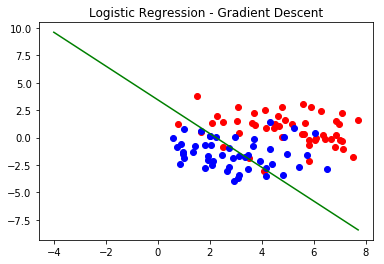

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

class LogisticRegression:
    def __init__(self, learning_rate=0.01, threshold=0.01, iterations=10000, train_intercept=True, verbose=False):
        self._learning_rate = learning_rate  # learning rate
        self._iterations = iterations  # number of iterations
        self._threshold = threshold  # threshold
        self._train_intercept = train_intercept  # whether to use intercept
        self._verbose = verbose  # Whether to print ongoing process

    # return theta coefficient
    def get_theta(self):
        return self._theta

    # intercept
    def add_intercept(self, x_data):
        return np.c_[np.ones((x_data.shape[0],1)),x_data]

    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


    def train(self, x_data, y_data):
        totalNum, totalCol = np.shape(x_data)

        if self._train_intercept:
            x_data = self.add_intercept(x_data)

        
        self._theta = np.zeros(x_data.shape[1])

        for i in range(self._iterations):
            hypothesis = self.sigmoid(np.dot(x_data, self._theta))

            # difference between hypothesis and real data
            diff = hypothesis - y_data

            # cost function
            cost = self.cost(hypothesis, y_data)
            gradient = np.dot(np.transpose(x_data), diff) / totalNum

            # Update theta using gradient
            self._theta -= self._learning_rate * gradient

            # Terminate the loop when cost < threshold
            if cost < self._threshold:
                return False

            # Print cost and theta when loop % 100 == 0
            if (self._verbose == True and i % 100 == 0):
                print('cost :', cost, '\t theta: ', self._theta)

    def plotGraph(self, x_data, y_data, theta):
        plt.title("Logistic Regression - Gradient Descent")
        plt.plot(x_data[np.flatnonzero(y_data == 1), 0], x_data[np.flatnonzero(y_data == 1), 1], 'ro')
        plt.plot(x_data[np.flatnonzero(y_data == 0), 0], x_data[np.flatnonzero(y_data == 0), 1], 'bo')
        plotX = [np.ndarray.min(x_data), np.ndarray.max(x_data)]
        plotY = np.subtract(np.multiply(-(theta[2]/theta[1]), plotX), theta[0]/theta[1])
        plt.plot(plotX, plotY, 'g-')
        plt.show()
  


if __name__ == "__main__":
    X = np.loadtxt('hw6x.dat')
    y = np.loadtxt('hw6y.dat')

    # Training
    model = LogisticRegression(learning_rate=0.1, threshold=0.01, iterations=10000, verbose=True)
    model.train(X, y)
    print(model.get_theta())
    model.plotGraph(X, y, model.get_theta())



## Q2
What are the coefficients 𝜃 resulting from your fit?


Answer: According to the program, coefficient is [-2.62051149  0.76037151  1.17194673]

## Newton's method

In [12]:
X = np.loadtxt('hw6x.dat')
y = np.loadtxt('hw6y.dat')

In [13]:
totalNum, totalCol = np.shape(X)

In [14]:
x_data = add_intercept(X)
theta = np.zeros(x_data.shape[1])
x_data = np.transpose(x_data)
y_data = np.array(y)

In [15]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [16]:
hypothesis = sigmoid(np.dot(np.transpose(theta), x_data))
diff = hypothesis - y_data
cost = cost(hypothesis, y_data)

Use the sigmoid function and cost function like the gradient descent method 

In [17]:
H = np.dot(hypothesis*(1 - hypothesis)*(x_data), x_data.T) / totalNum
dJ = np.sum(diff*x_data, axis=1) / totalNum
gradient = np.dot(inv(H), dJ)

#### Newton's method
$$
x_{t+1} = x_t - \frac{f'(x)}{f''(x)}
$$

So, we can write down the equation like below
$$
\theta = \theta - \frac{J'(\theta)}{J''(\theta)} = \theta - \frac{J'(\theta)}{H}=\theta-H^{-1}J'(\theta)
$$

where
$$
H_{ij}=\frac{\theta^2J(\theta)}{\partial\theta_i\theta_j}
$$

So, we can conclude
$$
J'(\theta) = \frac{1}{m}\sum_{i=1}^{m}(hx_i-y_i)x_i
$$

$$
H = \frac{1}{m}\sum_{i=1}^{m}hx_i(1-hx_i)x_i(x_i)^T
$$

In [18]:
theta = theta - np.transpose(np.array([gradient]))

In [19]:
print('cost :', cost, '\t theta: ', theta[:, 0])

cost : 0.6931471805599453 	 theta:  [-1.50983811  0.43509696  0.62161752]


An entire code for the newton's method is below

cost : 0.6931471805599453 	 theta:  [-1.50983811  0.43509696  0.62161752]
cost : 0.37472470757603904 	 theta:  [-2.21834632  0.64372727  0.95944716]
cost : 0.3342501357695513 	 theta:  [-2.55431051  0.74137714  1.13493588]
cost : 0.32928119947970075 	 theta:  [-2.61847133  0.75979248  1.1707512 ]
cost : 0.32914756442755344 	 theta:  [-2.62050954  0.76037096  1.17194549]
cost : 0.3291474312958551 	 theta:  [-2.6205116   0.76037154  1.17194674]
cost : 0.32914743129571206 	 theta:  [-2.6205116   0.76037154  1.17194674]
cost : 0.32914743129571195 	 theta:  [-2.6205116   0.76037154  1.17194674]
cost : 0.32914743129571206 	 theta:  [-2.6205116   0.76037154  1.17194674]
cost : 0.329147431295712 	 theta:  [-2.6205116   0.76037154  1.17194674]
[-2.6205116   0.76037154  1.17194674]


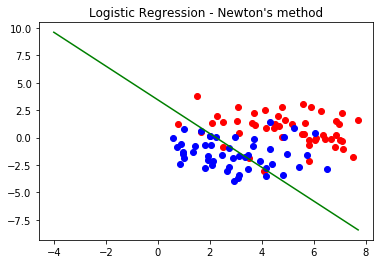

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

class LogisticRegression:
    def __init__(self, learning_rate=0.01, threshold=0.01, iterations=10, train_intercept=True):
        self._learning_rate = learning_rate  # learning rate
        self._iterations = iterations  # number of iteration
        self._threshold = threshold  # threshold
        self._train_intercept = train_intercept  # whether to use intercept
        

    # return theta coefficient
    def get_theta(self):
        return self._theta

    # intercept
    def add_intercept(self, x_data):
        return np.c_[np.ones((x_data.shape[0],1)),x_data]

    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def train(self, x_data, y_data):
        totalNum, totalCol = np.shape(x_data)

        if self._train_intercept:
            x_data = self.add_intercept(x_data)

        
        self._theta = np.zeros(x_data.shape[1])
        x_data = np.transpose(x_data)
        y_data = np.array(y_data)
        

        for i in range(self._iterations):
            hypothesis = self.sigmoid(np.dot(np.transpose(self._theta), x_data))

            # difference between hypothesis and real data
            diff = hypothesis - y_data

            # cost function
            cost = self.cost(hypothesis, y_data)
            H = np.dot(hypothesis*(1 - hypothesis)*(x_data), x_data.T) / totalNum
            dJ = np.sum(diff*x_data, axis=1) / totalNum
            gradient = np.dot(inv(H), dJ)

            # Update theta
            self._theta = self._theta - np.transpose(np.array([gradient]))

            print('cost :', cost, '\t theta: ', self._theta[:, 0])


    def plotGraph(self, x_data, y_data, theta):
        plt.title("Logistic Regression - Newton's method")
        plt.plot(x_data[np.flatnonzero(y_data == 1), 0], x_data[np.flatnonzero(y_data == 1), 1], 'ro')
        plt.plot(x_data[np.flatnonzero(y_data == 0), 0], x_data[np.flatnonzero(y_data == 0), 1], 'bo')
        plotX = [np.ndarray.min(x_data), np.ndarray.max(x_data)]
        plotY = np.subtract(np.multiply(-(theta[2][0]/theta[1][0]), plotX), theta[0][0]/theta[1][0])
        plt.plot(plotX, plotY, 'g-')
        plt.show()
    


if __name__ == "__main__":
    X = np.loadtxt('hw6x.dat')
    y = np.loadtxt('hw6y.dat')

    # Training
    model = LogisticRegression(learning_rate=0.1, threshold=0.01, iterations=10)
    model.train(X, y)
    print(model.get_theta()[:,0])
    model.plotGraph(X, y, model.get_theta())


## Q3
Compare the overall running time and number of iterations needed to converge to the same precision.

Answer: Overall running time: Logistic Regression using newton's method is much faster than Logistic Regression using gradient descent method. The coefficient converges after 5 iterations

## Q4
Plot the training data. Also plot on the same figure the decision boundary fit by logistic regression

Answer: Please check above. Just in case, I attached the graph with all homework files